In [1]:
import datetime
import ta
import warnings

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
from itertools import product
from TA_strats import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

pd.core.common.is_list_like = pd.api.types.is_list_like
pd.options.display.max_rows = 99999
pd.options.display.max_columns = 99999
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
initial_capital=10000
start_date = datetime.datetime(2020, 1, 1)
end_date = datetime.datetime(2024, 3, 30)
vix_db = dati_giornalieri('^VIX',start_date,end_date)
db=dati_giornalieri('ETH-USD',start_date,end_date)
db = db.rename(columns = {"Open": "open","Close":"close","High":"high","Low":"low"})
num_splits = 5
total_points = len(db)
split_size = int(total_points / num_splits)
cv_results = []
total_period = end_date - start_date
split_duration = total_period / num_splits
split_dates = [start_date + i * split_duration for i in range(num_splits)]
split_dates.append(end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## AaronX

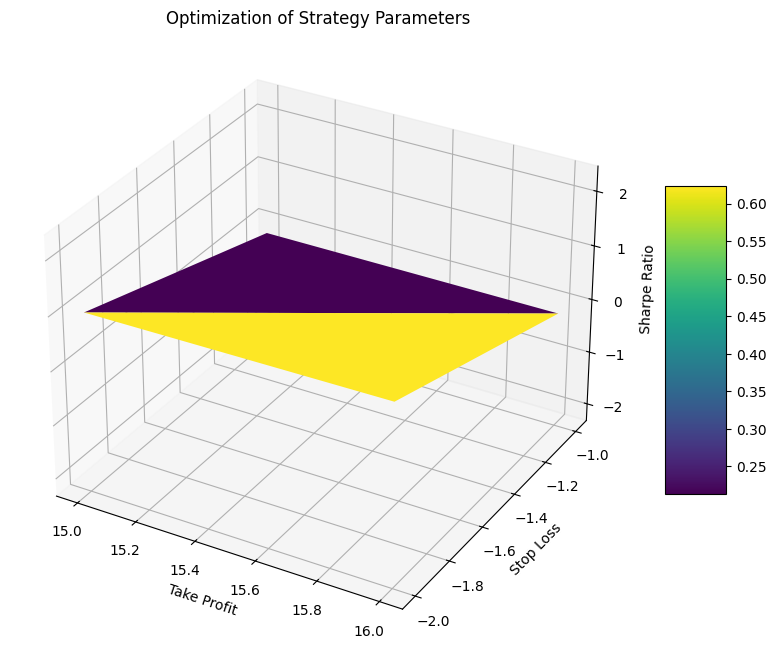

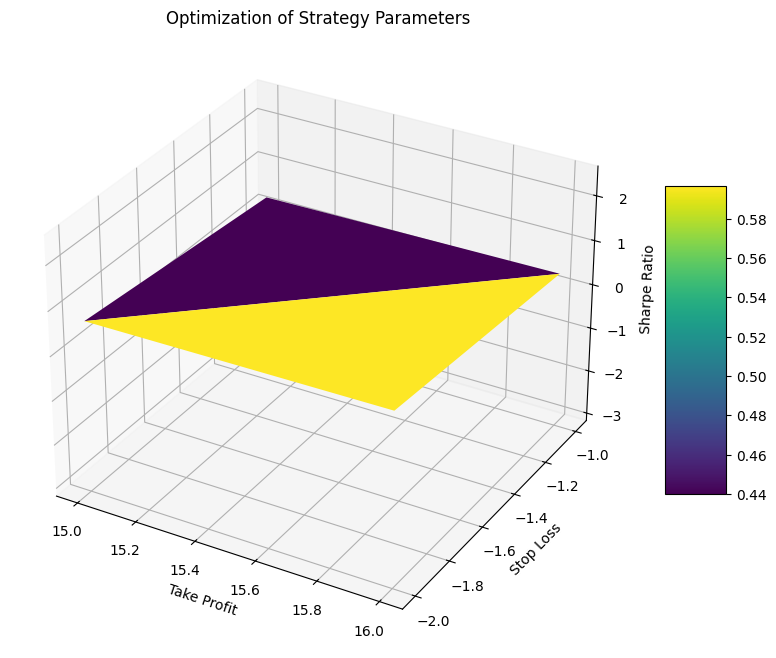

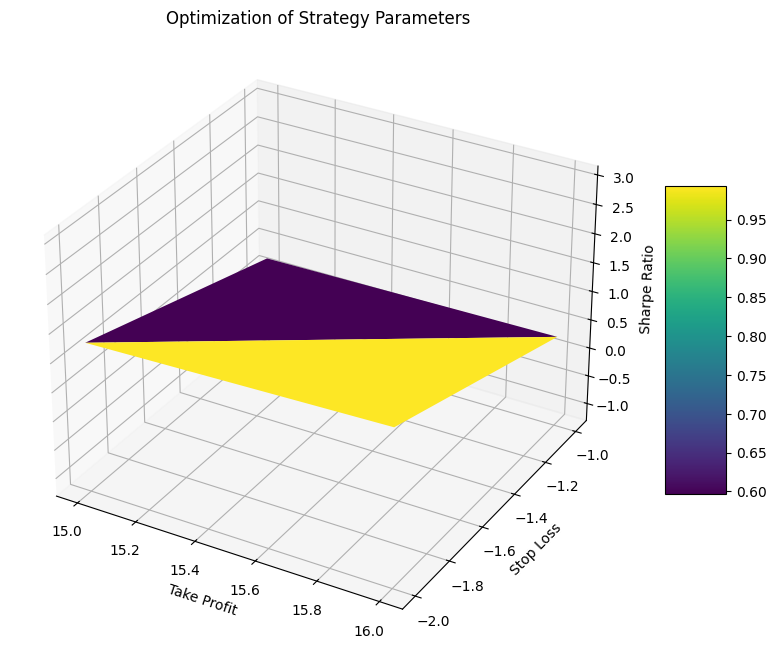

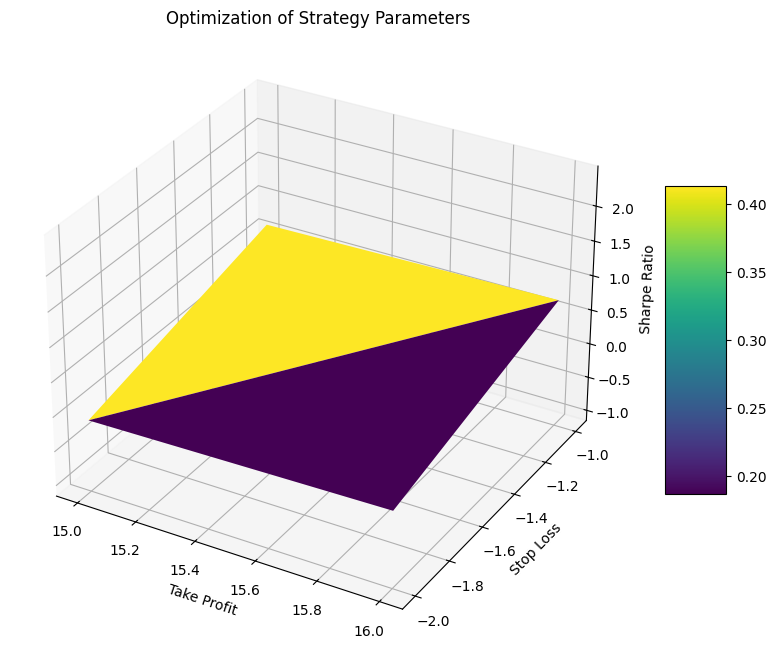

,sl,tp,n,Profit,Profit Factor,Sharpe Ratio,Max Draw Down %
14,-1.0,16.0,35.0,4795.0,7.94,2.36,-8.0
26,-2.0,15.0,40.0,2361.0,6.77,2.54,-4.0
25,-2.0,15.0,35.0,5314.0,11.74,3.06,-6.0
19,-1.0,16.0,60.0,1348.0,15.51,2.49,-1.0


In [3]:
cv_results = []
for i in range(num_splits - 1):
    train_start = split_dates[i-1] if i != 0 else start_date
    validation_end = split_dates[i]
    train_db_cv = db[train_start:validation_end]
    validation_db_cv = db[validation_end:split_dates[i+1]]
    param_grid = {
        'sl': [-j for j in range(1, 3, 1)],
        'tp': [j for j in range(15, 17, 1)],
        'n': range(20, 71, 5)
    }
    best_params_split = optimize_strategy_and_show_chart(validation_db_cv, strategy_AROON_Xcross, param_grid, initial_capital)
    cv_results.append(best_params_split)
cv_results_df = pd.DataFrame(cv_results)

cv_results_df

In [4]:
most_common_params = cv_results_df.mode().iloc[0]

print("Most common parameters across CV splits:", most_common_params)

Most common parameters across CV splits: sl                   -2.00
tp                   15.00
n                    35.00
Profit             1348.00
Profit Factor         6.77
Sharpe Ratio          2.36
Max Draw Down %      -8.00
Name: 0, dtype: float64


In [5]:
test_start = split_dates[-2]
test_end = split_dates[-1]
test_db = db[test_start:test_end]
db_strategiaX = strategy_AROON_Xcross(test_db, n=int(most_common_params['n']))
db_statsX = run_backtest(db_strategiaX, initial_capital, sl=-1, tp=15)

In [6]:
report_ax = report(db_statsX,db_statsX['P&L'],db_statsX['RIT_CUM'])
report_ax = pd.DataFrame(report_ax, index=['AaronX'])

report_ax

,Ritorno Ann,Volatilità Ann,Profitto,Profitto Buy&Hold,Operazioni Chiuse,Operazioni Long,Operazioni Short,Rendimento Medio,Rendimento Medio %,Dev. Std Rend. Med,Profit Factor,Profitto Lordo,Perdita Lorda,% Trade Vincenti,% Trade Perdenti,Reward Risk Ratio,Guadagno Massimo,Guadagno Massimo Data,Guadagno Medio,Guadagno % Medio,Dev. Std Guadagni,Perdita Massima,Perdita Massima Data,Perdita Media,Perdita % Media,Dev. Std Perdite,Avg Draw Down,Max Draw Down,Max Draw Down %,Sharpe Ratio,Sharpe Ratio B&H,VaR Historic,CVaR Historic,Sortino Ratio,Calmar Ratio,Burke Ratio,Modified Burke Ratio
AaronX,28.15,15.35,2336.0,9478.0,8,4,4,292.0,3.33,8.05,4.55,2995.0,-658.0,25.0,75.0,13.65,1589.0,2023-11-09,1497.0,16.32,1.87,-121.0,2024-02-09,-110.0,-1.0,0.01,-293.0,-477.0,-4.0,1.83,2.4,-0.0,0.05,2.2,7.04,0.99,17.38


## OBV

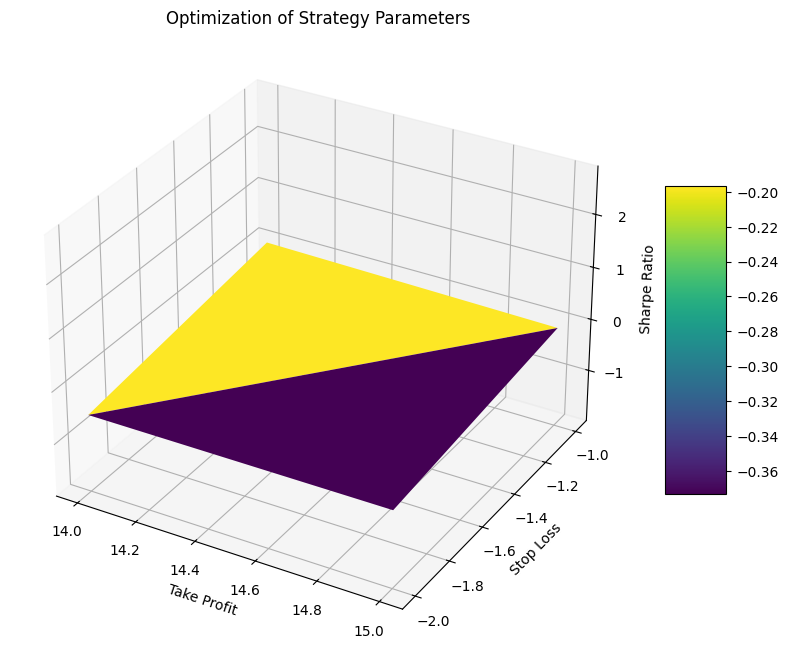

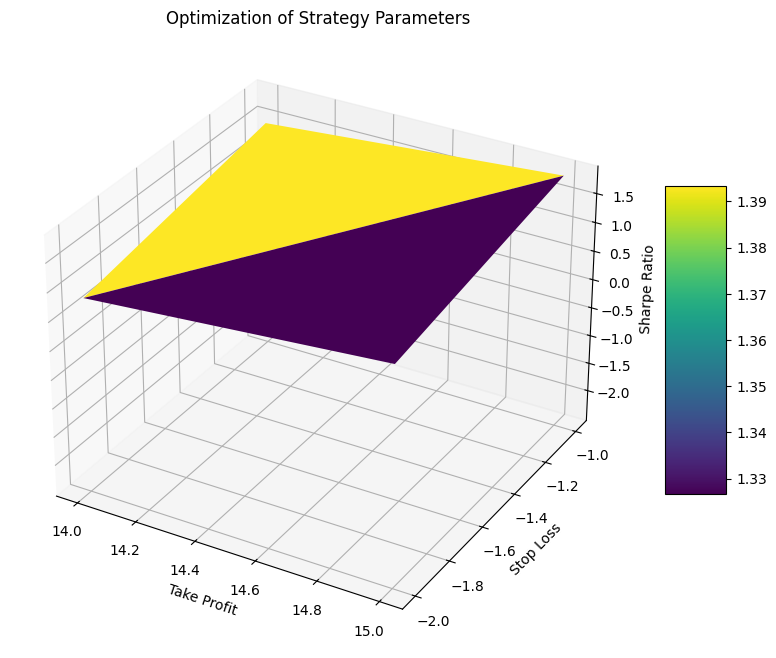

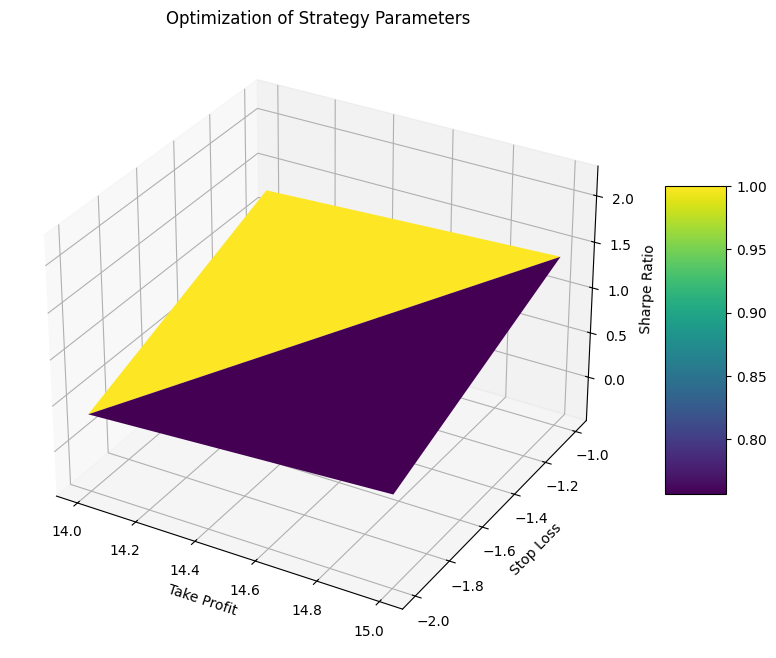

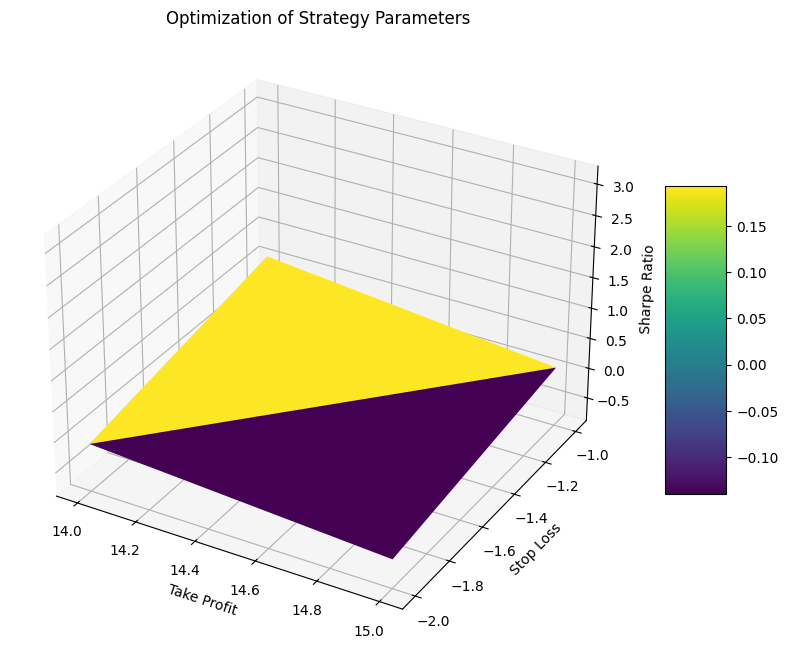

,sl,tp,n,Profit,Profit Factor,Sharpe Ratio,Max Draw Down %
7,-1.0,14.0,55.0,3682.0,5.88,2.80,-4.0
11,-1.0,15.0,20.0,4264.0,2.05,1.88,-11.0
17,-1.0,15.0,50.0,2963.0,3.35,2.26,-7.0
16,-1.0,15.0,45.0,7940.0,2.95,3.20,-10.0


In [7]:
cv_results = []
for i in range(num_splits - 1):
    train_start = split_dates[i-1] if i != 0 else start_date
    validation_end = split_dates[i]
    train_db_cv = db[train_start:validation_end]
    validation_db_cv = db[validation_end:split_dates[i+1]]
    param_grid = {
        'sl': [-j for j in range(1, 3, 1)],
        'tp': [j for j in range(14, 16, 1)],
        'n': range(20, 71, 5)
    }
    best_params_split = optimize_strategy_and_show_chart(validation_db_cv, strategy_OBV, param_grid, initial_capital)
    cv_results.append(best_params_split)
cv_results_df = pd.DataFrame(cv_results)

cv_results_df

In [8]:
most_common_params = cv_results_df.mode().iloc[0]

print("Most common parameters across CV splits:", most_common_params)

Most common parameters across CV splits: sl                   -1.00
tp                   15.00
n                    20.00
Profit             2963.00
Profit Factor         2.05
Sharpe Ratio          1.88
Max Draw Down %     -11.00
Name: 0, dtype: float64


In [9]:
test_start = split_dates[-2]
test_end = split_dates[-1]
test_db = db[test_start:test_end]
db_strategia_obv = strategy_OBV(test_db, n=int(most_common_params['n']))
db_stats_obv = run_backtest(db_strategia_obv, initial_capital, sl=-1, tp=14)

In [10]:
report_obv = report(db_stats_obv,db_stats_obv['P&L'],db_stats_obv['RIT_CUM'])
report_obv = pd.DataFrame(report_obv, index=['OBV'])

report_obv

,Ritorno Ann,Volatilità Ann,Profitto,Profitto Buy&Hold,Operazioni Chiuse,Operazioni Long,Operazioni Short,Rendimento Medio,Rendimento Medio %,Dev. Std Rend. Med,Profit Factor,Profitto Lordo,Perdita Lorda,% Trade Vincenti,% Trade Perdenti,Reward Risk Ratio,Guadagno Massimo,Guadagno Massimo Data,Guadagno Medio,Guadagno % Medio,Dev. Std Guadagni,Perdita Massima,Perdita Massima Data,Perdita Media,Perdita % Media,Dev. Std Perdite,Avg Draw Down,Max Draw Down,Max Draw Down %,Sharpe Ratio,Sharpe Ratio B&H,VaR Historic,CVaR Historic,Sortino Ratio,Calmar Ratio,Burke Ratio,Modified Burke Ratio
OBV,21.45,23.81,1788.0,9478.0,34,20,20,29.0,0.37,4.31,1.37,3724.0,-2721.0,8.82,91.18,14.14,1313.0,2024-01-11,1241.0,14.0,0.0,-109.0,2024-03-18,-88.0,-0.95,0.15,-713.0,-1481.0,-14.0,0.9,2.4,0.99,2.16,0.98,1.53,0.19,3.38


## AaronY

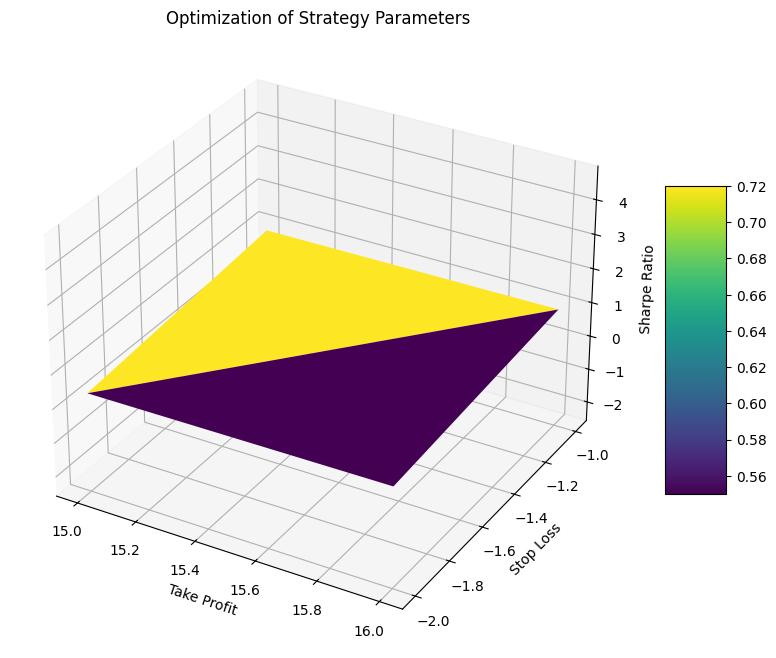

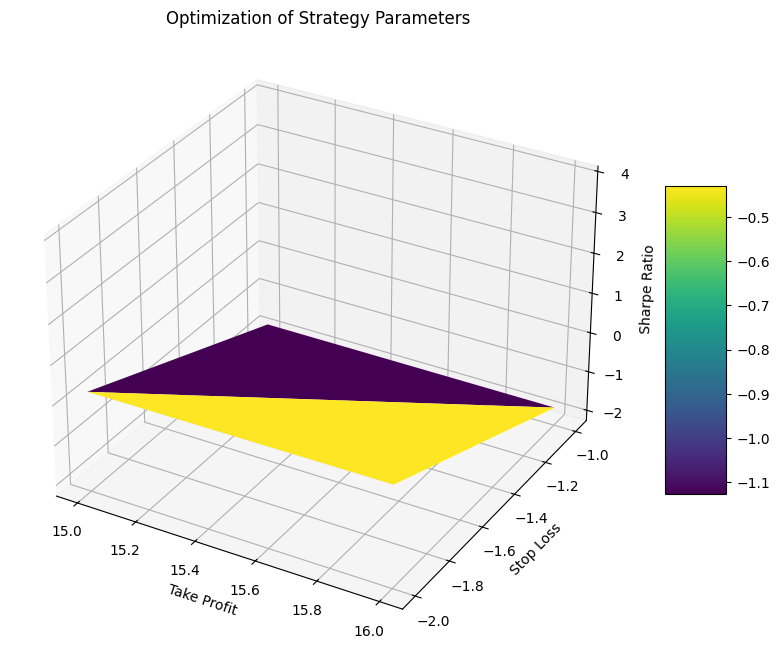

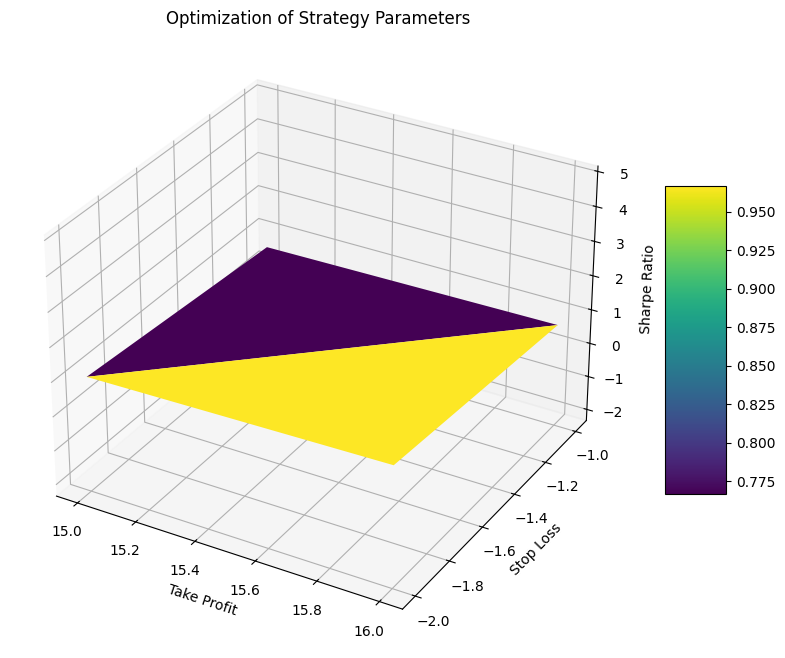

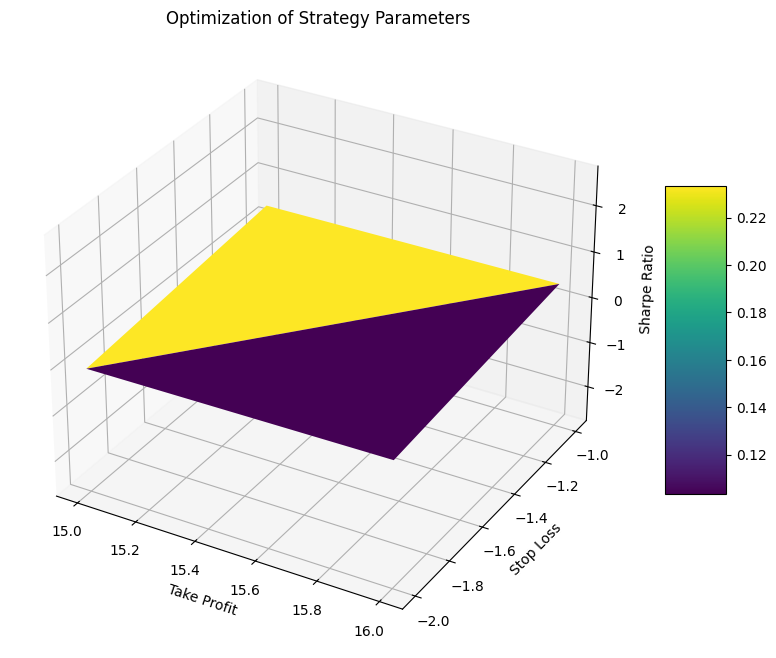

,sl,tp,n,livello,Profit,Profit Factor,Sharpe Ratio,Max Draw Down %
339,-2.0,16.0,20.0,95.0,12603.0,8.15,4.81,-6.0
377,-2.0,16.0,40.0,85.0,8354.0,9.49,4.00,-6.0
254,-2.0,15.0,35.0,70.0,10182.0,10.38,5.00,-6.0
180,-1.0,16.0,55.0,50.0,1751.0,16.72,2.73,-1.0


In [100]:
cv_results = []
for i in range(num_splits - 1):
    train_start = split_dates[i-1] if i != 0 else start_date
    validation_end = split_dates[i]
    train_db_cv = db[train_start:validation_end]
    validation_db_cv = db[validation_end:split_dates[i+1]]
    param_grid = {
        'sl': [-j for j in range(1, 3, 1)],
        'tp': [j for j in range(15, 17, 1)],
        'n': range(20, 71, 5),
        'livello': range(50, 100, 5)
    }
    best_params_split = optimize_strategy_and_show_chart(validation_db_cv, strategy_AROON_Ycross, param_grid, initial_capital)
    cv_results.append(best_params_split)
cv_results_df = pd.DataFrame(cv_results)

cv_results_df

In [101]:
most_common_params = cv_results_df.mode().iloc[0]

print("Most common parameters across CV splits:", most_common_params)

Most common parameters across CV splits: sl                   -2.00
tp                   16.00
n                    20.00
livello              50.00
Profit             1751.00
Profit Factor         8.15
Sharpe Ratio          2.73
Max Draw Down %      -6.00
Name: 0, dtype: float64


In [25]:
test_start = split_dates[-2]
test_end = split_dates[-1]
test_db = db[test_start:test_end]
db_strategiaY = strategy_AROON_Ycross(test_db, n=int(most_common_params['n']), livello=int(most_common_params['livello']))
db_statsY = run_backtest(db_strategiaY, initial_capital, sl=-1, tp=15)

In [26]:
report_ay = report(db_statsY,db_statsY['P&L'],db_statsY['RIT_CUM'])
report_ay = pd.DataFrame(report_ay, index=['AaronY'])

report_ay

,Ritorno Ann,Volatilità Ann,Profitto,Profitto Buy&Hold,Operazioni Chiuse,Operazioni Long,Operazioni Short,Rendimento Medio,Rendimento Medio %,Dev. Std Rend. Med,Profit Factor,Profitto Lordo,Perdita Lorda,% Trade Vincenti,% Trade Perdenti,Reward Risk Ratio,Guadagno Massimo,Guadagno Massimo Data,Guadagno Medio,Guadagno % Medio,Dev. Std Guadagni,Perdita Massima,Perdita Massima Data,Perdita Media,Perdita % Media,Dev. Std Perdite,Avg Draw Down,Max Draw Down,Max Draw Down %,Sharpe Ratio,Sharpe Ratio B&H,VaR Historic,CVaR Historic,Sortino Ratio,Calmar Ratio,Burke Ratio,Modified Burke Ratio
AaronY,77.57,19.63,6260.0,9478.0,8,4,4,782.0,7.33,8.94,14.04,6740.0,-480.0,50.0,50.0,14.04,1879.0,2023-12-09,1685.0,15.66,1.32,-139.0,2023-12-27,-120.0,-0.99,0.0,-366.0,-742.0,-5.0,3.95,2.4,0.14,1.15,3.81,15.51,2.4,42.14


## Oscillatore Stocastico

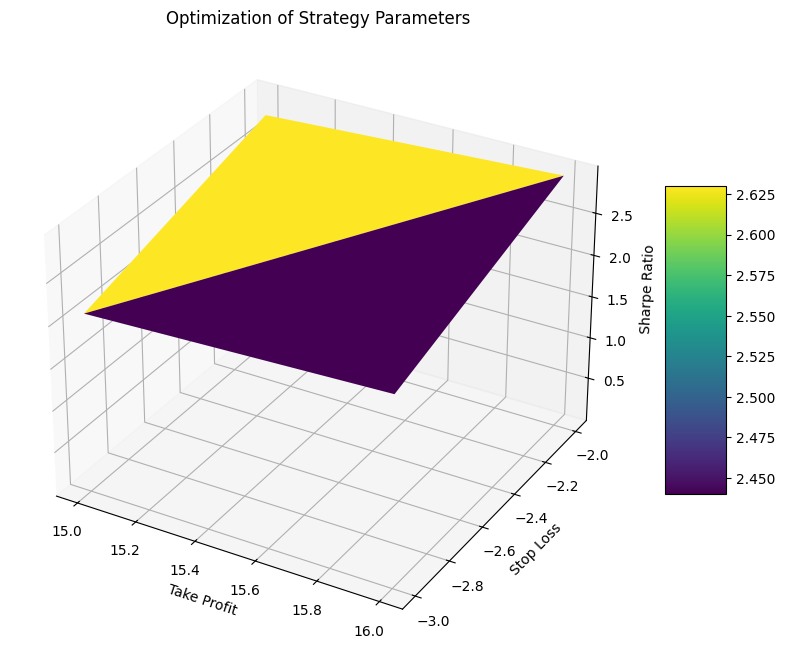

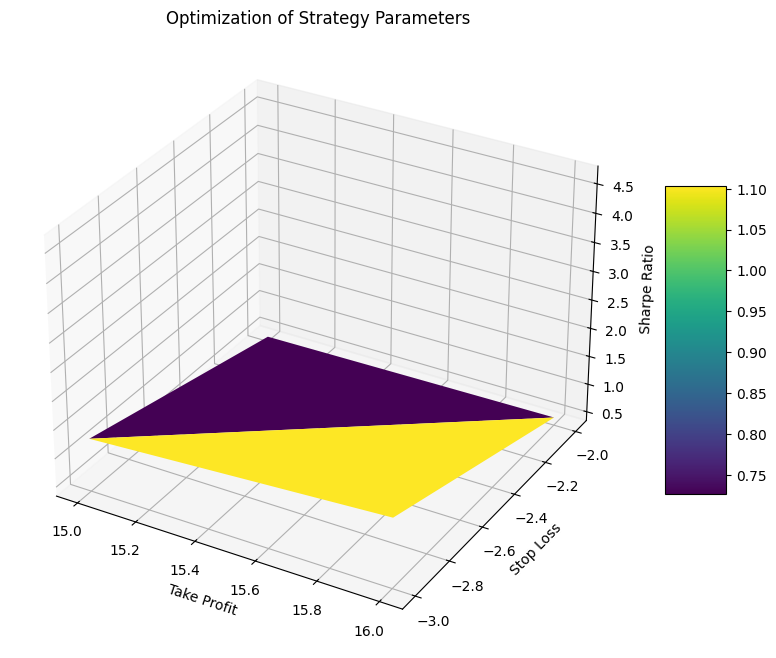

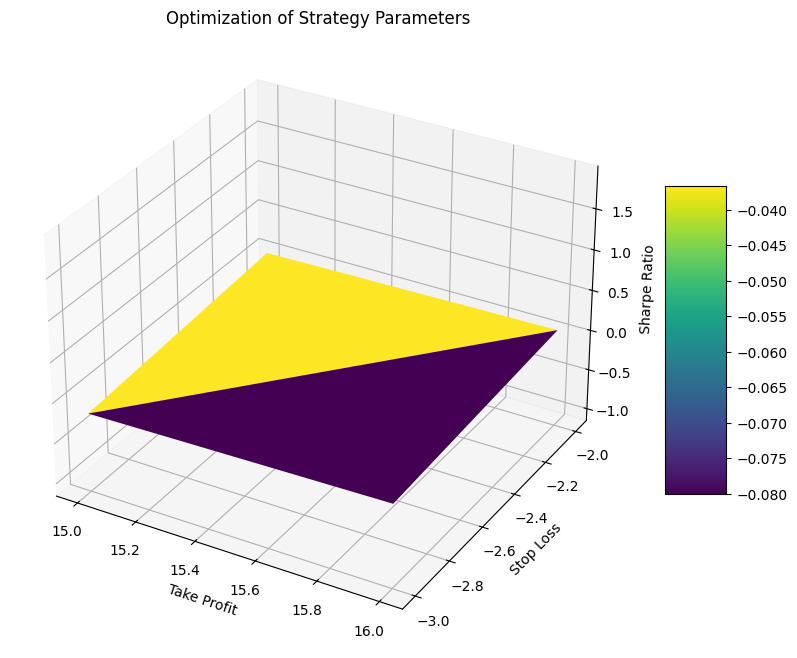

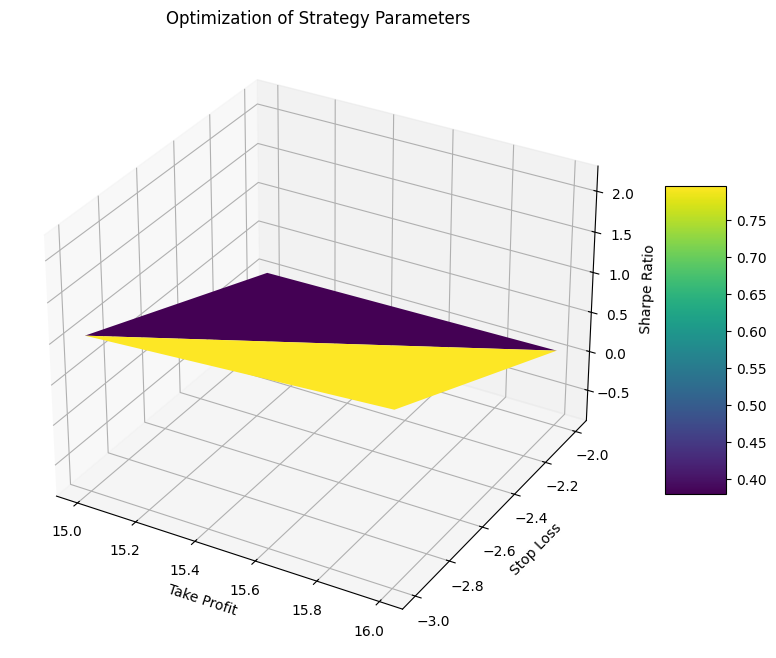

,sl,tp,k,Profit,Profit Factor,Sharpe Ratio,Max Draw Down %
11,-2.0,16.0,10.0,11884.0,1.70,2.99,-19.0
35,-3.0,16.0,20.0,18944.0,2.17,4.71,-29.0
21,-2.0,16.0,60.0,6116.0,1.79,1.95,-17.0
34,-3.0,16.0,15.0,8017.0,1.82,2.24,-15.0


In [36]:
cv_results = []
for i in range(num_splits - 1):
    train_start = split_dates[i-1] if i != 0 else start_date
    validation_end = split_dates[i]
    train_db_cv = db[train_start:validation_end]
    validation_db_cv = db[validation_end:split_dates[i+1]]
    param_grid = {
    'sl': [-i for i in range(2, 4, 1)],
    'tp': [i for i in range(15, 17, 1)],
    'k': range(10, 61, 5)
    }
    best_params_split = optimize_strategy_and_show_chart(validation_db_cv, strategy_Stocastico, param_grid, initial_capital)
    cv_results.append(best_params_split)
cv_results_df = pd.DataFrame(cv_results)

cv_results_df

In [37]:
most_common_params = cv_results_df.mode().iloc[0]

print("Most common parameters across CV splits:", most_common_params)

Most common parameters across CV splits: sl                   -3.00
tp                   16.00
k                    10.00
Profit             6116.00
Profit Factor         1.70
Sharpe Ratio          1.95
Max Draw Down %     -29.00
Name: 0, dtype: float64


In [38]:
test_start = split_dates[-2]
test_end = split_dates[-1]
test_db = db[test_start:test_end]
db_strategia_stoch = strategy_Stocastico(test_db, k=int(most_common_params['k']))
db_stats_stoch = run_backtest(db_strategia_stoch, initial_capital, sl=-3, tp=16)

In [39]:
report_stoch = report(db_stats_stoch,db_stats_stoch['P&L'],db_stats_stoch['RIT_CUM'])
report_stoch = pd.DataFrame(report_stoch, index=['Stoch'])

report_stoch

,Ritorno Ann,Volatilità Ann,Profitto,Profitto Buy&Hold,Operazioni Chiuse,Operazioni Long,Operazioni Short,Rendimento Medio,Rendimento Medio %,Dev. Std Rend. Med,Profit Factor,Profitto Lordo,Perdita Lorda,% Trade Vincenti,% Trade Perdenti,Reward Risk Ratio,Guadagno Massimo,Guadagno Massimo Data,Guadagno Medio,Guadagno % Medio,Dev. Std Guadagni,Perdita Massima,Perdita Massima Data,Perdita Media,Perdita % Media,Dev. Std Perdite,Avg Draw Down,Max Draw Down,Max Draw Down %,Sharpe Ratio,Sharpe Ratio B&H,VaR Historic,CVaR Historic,Sortino Ratio,Calmar Ratio,Burke Ratio,Modified Burke Ratio
AaronY,48.77,34.93,3997.0,9478.0,51,28,27,70.0,0.89,5.54,1.41,12349.0,-8774.0,37.25,62.75,2.37,1898.0,2024-02-14,650.0,6.43,5.66,-421.0,2024-02-18,-274.0,-2.41,0.94,-856.0,-2046.0,-17.0,1.4,2.4,2.6,3.04,2.6,2.87,0.39,6.92


## Parabolic SAR

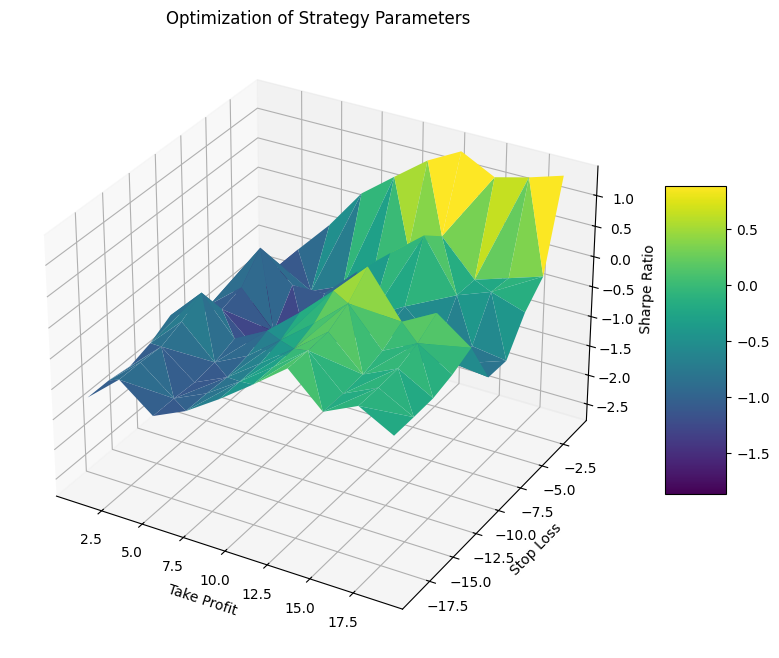

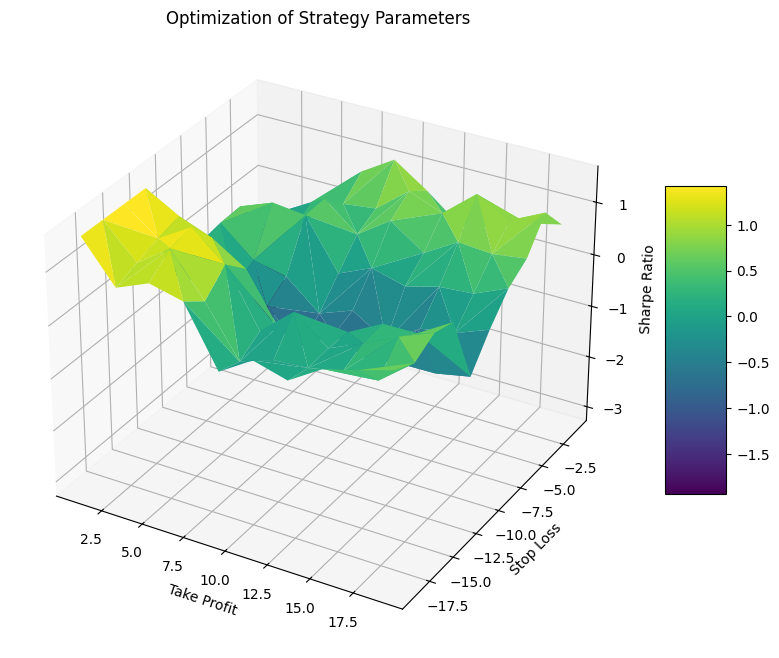

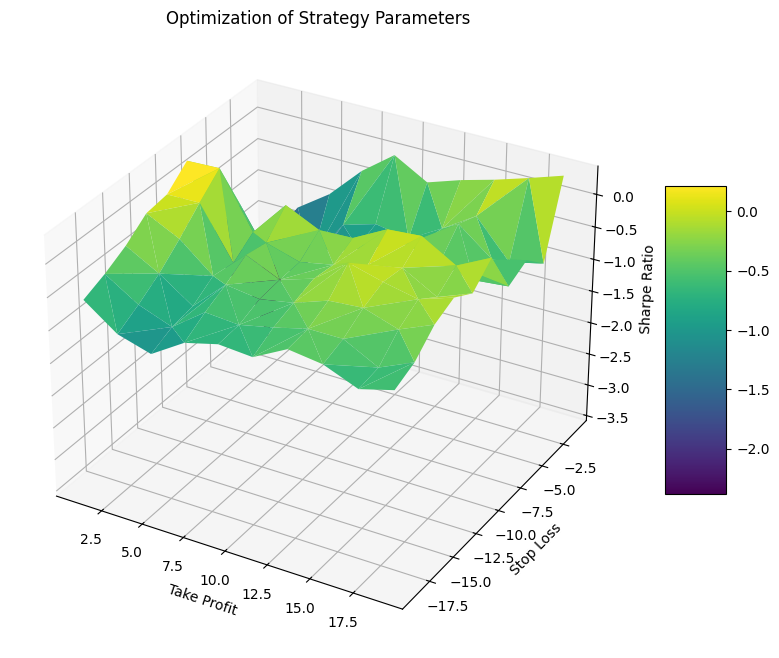

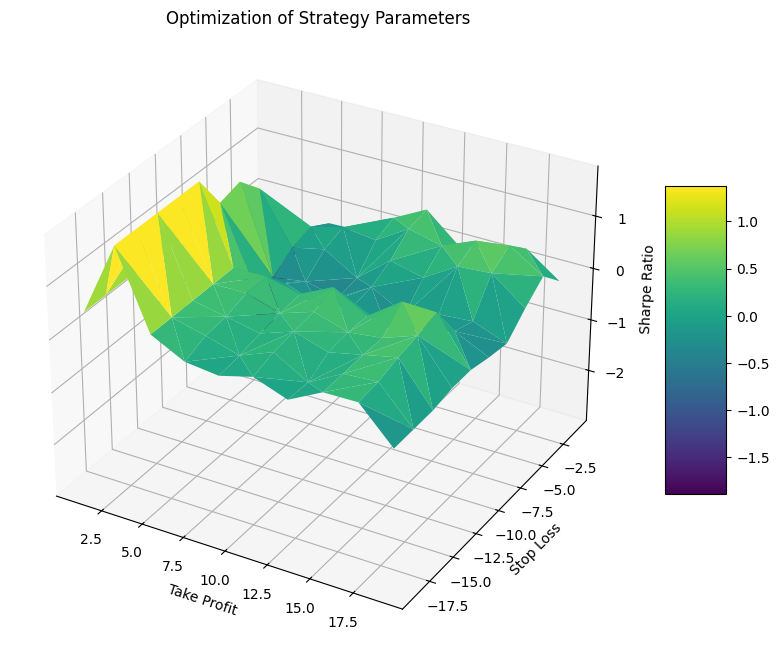

,sl,tp,Profit,Profit Factor,Sharpe Ratio,Max Draw Down %
9,-1.0,19.0,2952.0,1.420000e+00,1.39,-15.0
60,-13.0,1.0,1774.0,2.496000e+11,1.58,-7.0
9,-1.0,19.0,603.0,1.250000e+00,0.35,-14.0
81,-17.0,3.0,3761.0,2.360000e+00,1.84,-14.0


In [43]:
cv_results = []
for i in range(num_splits - 1):
    train_start = split_dates[i-1] if i != 0 else start_date
    validation_end = split_dates[i]
    train_db_cv = db[train_start:validation_end]
    validation_db_cv = db[validation_end:split_dates[i+1]]
    param_grid = {
    'sl': [-i for i in range(1, 20, 2)],
    'tp': [i for i in range(1, 20, 2)]
    }
    best_params_split = optimize_strategy_and_show_chart(validation_db_cv, strategy_PSAR, param_grid, initial_capital)
    cv_results.append(best_params_split)
cv_results_df = pd.DataFrame(cv_results)

cv_results_df

In [44]:
most_common_params = cv_results_df.mode().iloc[0]

print("Most common parameters across CV splits:", most_common_params)

Most common parameters across CV splits: sl                  -1.00
tp                  19.00
Profit             603.00
Profit Factor        1.25
Sharpe Ratio         0.35
Max Draw Down %    -14.00
Name: 0, dtype: float64


In [45]:
test_start = split_dates[-2]
test_end = split_dates[-1]
test_db = db[test_start:test_end]
db_strategia_sar = strategy_PSAR(test_db)
db_stats_sar = run_backtest(db_strategia_sar, initial_capital, sl=most_common_params['sl'], tp=most_common_params['tp'])

In [46]:
report_sar = report(db_stats_sar,db_stats_sar['P&L'],db_stats_sar['RIT_CUM'])
report_sar = pd.DataFrame(report_sar, index=['SAR'])

report_sar

,Ritorno Ann,Volatilità Ann,Profitto,Profitto Buy&Hold,Operazioni Chiuse,Operazioni Long,Operazioni Short,Rendimento Medio,Rendimento Medio %,Dev. Std Rend. Med,Profit Factor,Profitto Lordo,Perdita Lorda,% Trade Vincenti,% Trade Perdenti,Reward Risk Ratio,Guadagno Massimo,Guadagno Massimo Data,Guadagno Medio,Guadagno % Medio,Dev. Std Guadagni,Perdita Massima,Perdita Massima Data,Perdita Media,Perdita % Media,Dev. Std Perdite,Avg Draw Down,Max Draw Down,Max Draw Down %,Sharpe Ratio,Sharpe Ratio B&H,VaR Historic,CVaR Historic,Sortino Ratio,Calmar Ratio,Burke Ratio,Modified Burke Ratio
SAR,19.89,16.58,1660.0,9478.0,23,12,12,60.0,0.74,5.76,1.7,3364.0,-1981.0,8.7,91.3,17.83,1839.0,2024-02-18,1682.0,19.0,0.0,-115.0,2024-03-07,-94.0,-0.99,0.01,-555.0,-1133.0,-11.0,1.2,2.4,0.92,1.53,1.62,1.81,0.2,3.51


## KAMA

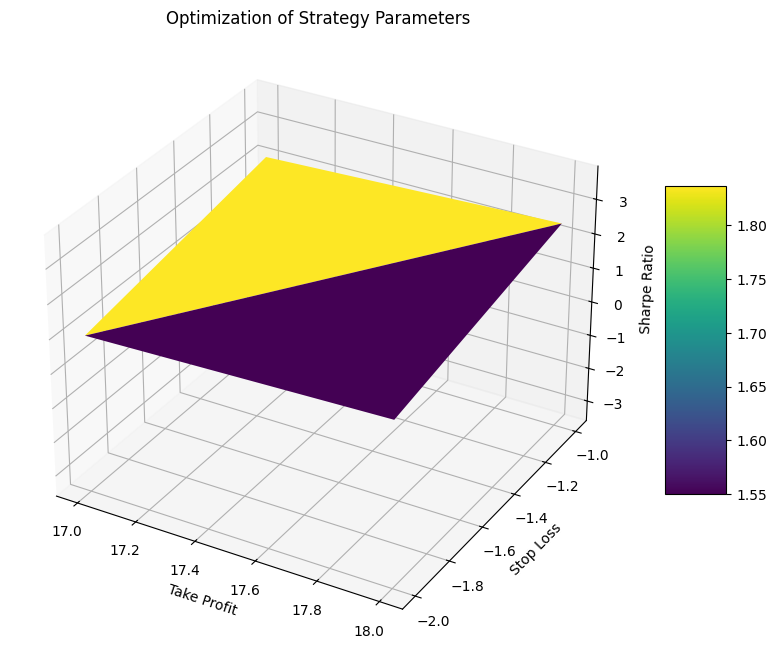

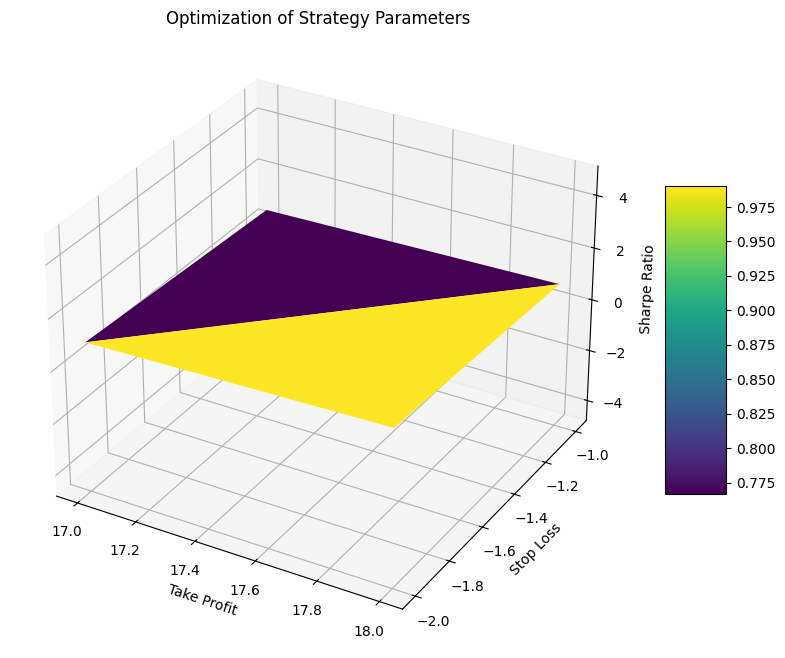

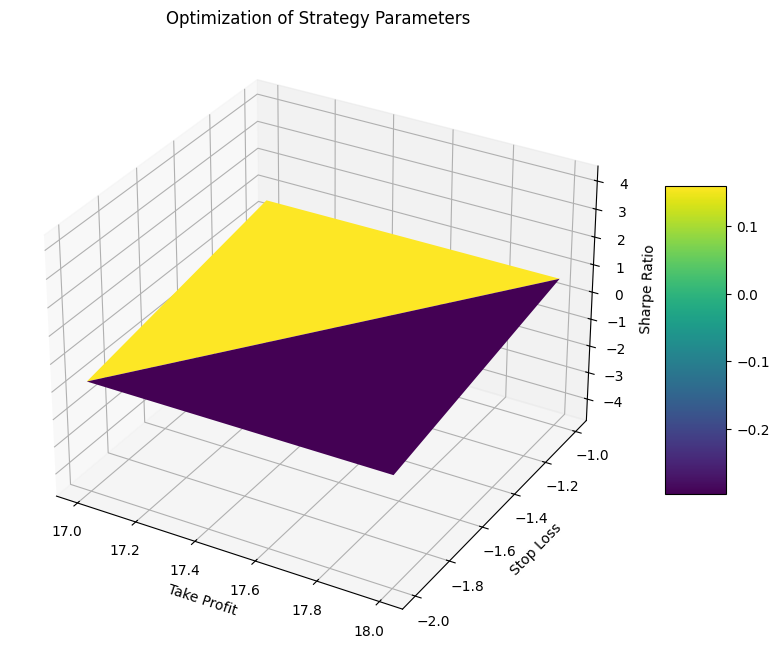

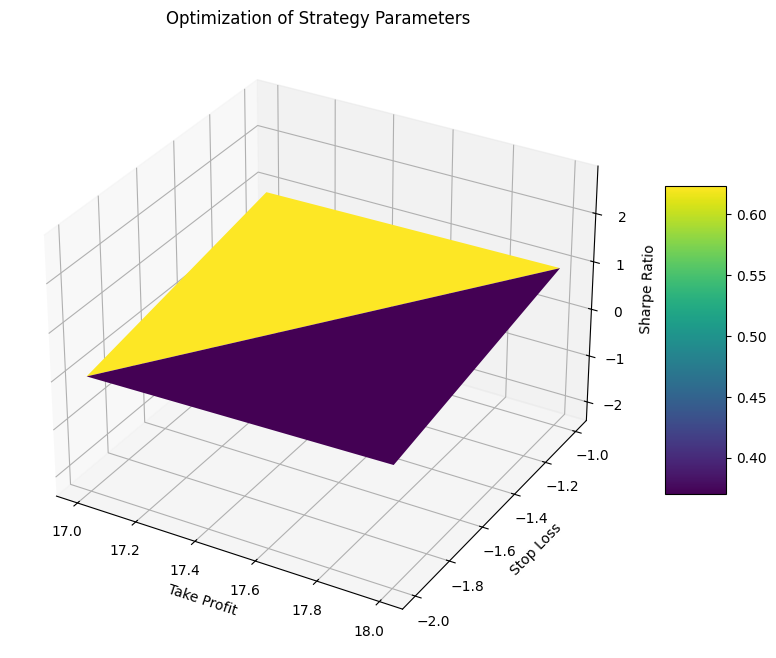

,sl,tp,n,f,l,Profit,Profit Factor,Sharpe Ratio,Max Draw Down %
4287,-2.0,18.0,30.0,10.0,60.0,8119.0,12.42,3.80,-7.0
2451,-2.0,17.0,5.0,3.0,65.0,13513.0,2.63,4.90,-13.0
1651,-1.0,18.0,25.0,1.0,25.0,10219.0,6.31,4.34,-10.0
3455,-2.0,17.0,50.0,5.0,25.0,7196.0,11.24,2.86,-10.0


In [163]:
cv_results = []
for i in range(num_splits - 1):
    train_start = split_dates[i-1] if i != 0 else start_date
    validation_end = split_dates[i]
    train_db_cv = db[train_start:validation_end]
    validation_db_cv = db[validation_end:split_dates[i+1]]
    param_grid = {
    'sl': [-i for i in range(1, 3, 1)],
    'tp': [i for i in range(17, 19, 1)],
    'n': range(5, 56, 5),
    'f': range(1, 11, 1),
    'l': range(20, 71, 5)
    }
    best_params_split = optimize_strategy_and_show_chart(validation_db_cv, strategy_KAMA, param_grid, initial_capital)
    cv_results.append(best_params_split)
cv_results_df = pd.DataFrame(cv_results)

cv_results_df

In [164]:
most_common_params = cv_results_df.mode().iloc[0]

print("Most common parameters across CV splits:", most_common_params)

Most common parameters across CV splits: sl                   -2.00
tp                   17.00
n                     5.00
f                     1.00
l                    25.00
Profit             7196.00
Profit Factor         2.63
Sharpe Ratio          2.86
Max Draw Down %     -10.00
Name: 0, dtype: float64


In [183]:
test_start = split_dates[-2]
test_end = split_dates[-1]
test_db = db[test_start:test_end]
db_strategia_kama = strategy_KAMA(test_db, n=50, f=5, l=25)
db_stats_kama = run_backtest(db_strategia_kama, initial_capital, sl=-2, tp=17)

In [184]:
report_kama = report(db_stats_kama,db_stats_kama['P&L'],db_stats_kama['RIT_CUM'])
report_kama = pd.DataFrame(report_kama, index=['KAMA'])

report_kama

,Ritorno Ann,Volatilità Ann,Profitto,Profitto Buy&Hold,Operazioni Chiuse,Operazioni Long,Operazioni Short,Rendimento Medio,Rendimento Medio %,Dev. Std Rend. Med,Profit Factor,Profitto Lordo,Perdita Lorda,% Trade Vincenti,% Trade Perdenti,Reward Risk Ratio,Guadagno Massimo,Guadagno Massimo Data,Guadagno Medio,Guadagno % Medio,Dev. Std Guadagni,Perdita Massima,Perdita Massima Data,Perdita Media,Perdita % Media,Dev. Std Perdite,Avg Draw Down,Max Draw Down,Max Draw Down %,Sharpe Ratio,Sharpe Ratio B&H,VaR Historic,CVaR Historic,Sortino Ratio,Calmar Ratio,Burke Ratio,Modified Burke Ratio
KAMA,41.92,15.13,3450.0,9478.0,2,1,1,1725.0,18.74,2.46,3.450000e+11,3450.0,0.0,100.0,0.0,NaN,1801.0,2023-11-09,1725.0,18.74,2.46,1648.0,2023-08-17,NaN,NaN,NaN,-95.0,-279.0,-2.0,2.77,2.4,0.03,0.65,3.62,20.96,8.24,144.86


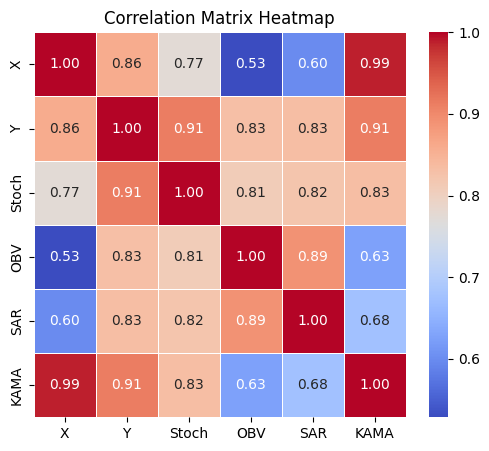

In [191]:
strategies_df = pd.DataFrame({
    'X': db_statsX['RIT_CUM'],
    'Y': db_statsY['RIT_CUM'],
    'Stoch': db_stats_stoch['RIT_CUM'],
    'OBV': db_stats_obv['RIT_CUM'],
    'SAR': db_stats_sar['RIT_CUM'],
    'KAMA': db_stats_kama['RIT_CUM']
})
correlation_matrix = strategies_df.corr()

plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

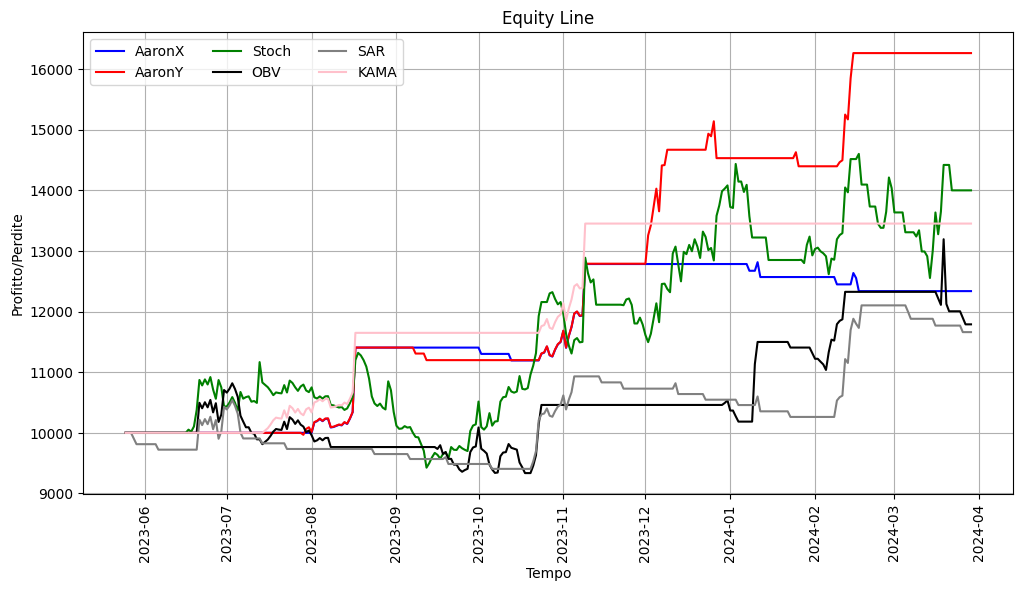

In [190]:
plot_equity(
    ('AaronX', db_statsX['RIT_CUM']),
    ('AaronY', db_statsY['RIT_CUM']),
    ('Stoch', db_stats_stoch['RIT_CUM']),
    ('OBV', db_stats_obv['RIT_CUM']),
    ('SAR', db_stats_sar['RIT_CUM']),
    ('KAMA', db_stats_kama['RIT_CUM']),
    colors=(
        'blue', 'red', 'green', 'black', 'gray', 'pink'
    )
)